In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("verisetleri/train.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data=np.array(data)
m, n= data.shape
np.random.shuffle(data)

data_dev=data[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]
X_dev = X_dev / 255.

data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [5]:
def init_params():
    w1=np.random.rand(10,784)-0.5
    b1=np.random.rand(10,1)-0.5
    w2=np.random.rand(10,10)-0.5
    b2=np.random.rand(10,1)-0.5
    return w1, b1, w2, b2

In [6]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [7]:
def softmax(Z):
    A=np.exp(Z) / sum(np.exp(Z))
    return A

In [8]:
def forward_prop(w1, b1, w2, b2, X):
    z1=w1.dot(X)+b1
    a1=ReLU(z1)
    z2=w2.dot(a1)+b2
    a2=softmax(z2)
    return z1, a1, z2, a2

In [9]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [10]:
def deriv_ReLU(Z):
    return Z>0

In [11]:
def back_prop(z1, a1, z2, a2, w2, Y, X):
    OneHot_Y=one_hot(Y)
    dZ2=a2-OneHot_Y
    dW2=1/m * dZ2.dot(a1.T)
    db2=1/m * np.sum(dZ2)
    dZ1=w2.T.dot(dZ2)*deriv_ReLU(z1)
    dW1=1/m * dZ1.dot(X.T)
    db1=1/m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [12]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1=W1-alpha*dW1
    b1=b1-alpha*db1
    W2=W2-alpha*dW2
    b2=b2-alpha*db2
    return W1, b1, W2, b2

In [13]:
def get_predictions(a2):
    return np.argmax(a2,0)

In [14]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y)/Y.size

In [15]:
def gradient_descent(X, Y, iterations, alpha):
    w1, b1, w2, b2=init_params()
    for i in range(iterations):
        z1, a1, z2, a2 =forward_prop(w1, b1, w2, b2, X)
        dW1, db1, dW2, db2 = back_prop(z1, a1, z2, a2, w2, Y, X)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dW1, db1, dW2, db2, alpha)
        if i%10==0:
            print("iterations: ",i)
            print("accuracy: ",get_accuracy(get_predictions(a2),Y))
    return w1, b1, w2, b2

In [18]:
w1, b1, w2, b2=gradient_descent(X_train, Y_train, 200, 0.1)

iterations:  0
[8 1 8 ... 4 1 9] [7 2 4 ... 8 1 4]
accuracy:  0.094
iterations:  10
[8 0 8 ... 2 1 6] [7 2 4 ... 8 1 4]
accuracy:  0.20709756097560975
iterations:  20
[9 6 8 ... 2 1 6] [7 2 4 ... 8 1 4]
accuracy:  0.3098780487804878
iterations:  30
[7 6 8 ... 2 1 4] [7 2 4 ... 8 1 4]
accuracy:  0.4143170731707317
iterations:  40
[7 6 8 ... 1 1 4] [7 2 4 ... 8 1 4]
accuracy:  0.4943170731707317
iterations:  50
[7 6 8 ... 1 1 4] [7 2 4 ... 8 1 4]
accuracy:  0.5549268292682927
iterations:  60
[7 2 8 ... 1 1 4] [7 2 4 ... 8 1 4]
accuracy:  0.5955121951219512
iterations:  70
[7 2 8 ... 1 1 4] [7 2 4 ... 8 1 4]
accuracy:  0.6267560975609756
iterations:  80
[7 2 7 ... 1 1 4] [7 2 4 ... 8 1 4]
accuracy:  0.6522682926829269
iterations:  90
[7 2 9 ... 1 1 4] [7 2 4 ... 8 1 4]
accuracy:  0.6729512195121952
iterations:  100
[7 2 9 ... 1 1 4] [7 2 4 ... 8 1 4]
accuracy:  0.6906829268292682
iterations:  110
[7 2 9 ... 1 1 4] [7 2 4 ... 8 1 4]
accuracy:  0.7046097560975609
iterations:  120
[7 2 9 ...

In [19]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [20]:
def test_prediction(index, w1, b1,w2,b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], w1,b1,w2,b2)
    label = Y_train[index]

    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation="nearest")
    plt.show()

Prediction:  [7]
Label:  7


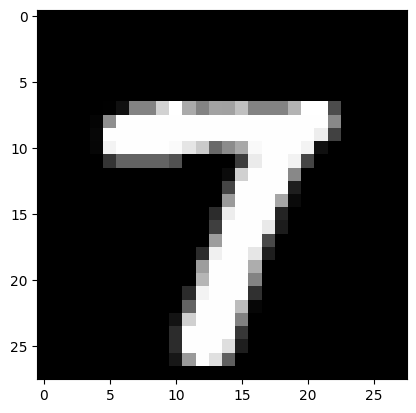

Prediction:  [2]
Label:  2


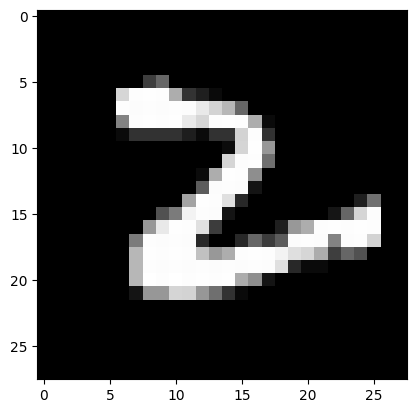

Prediction:  [4]
Label:  4


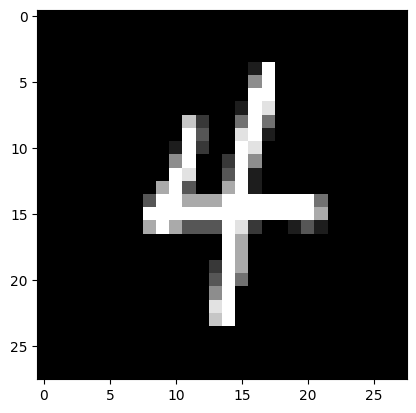

Prediction:  [1]
Label:  1


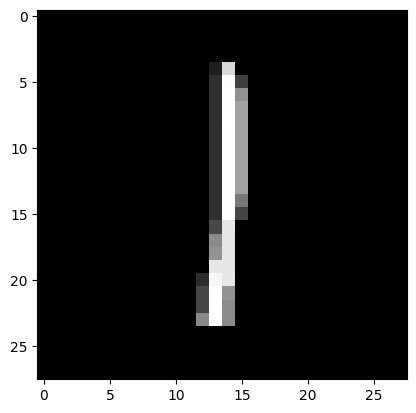

In [21]:
test_prediction(0, w1,b1,w2,b2)
test_prediction(1, w1,b1,w2,b2)
test_prediction(2, w1,b1,w2,b2)
test_prediction(3, w1,b1,w2,b2)

In [22]:
dev_predictions = make_predictions(X_dev, w1,b1,w2,b2)
get_accuracy(dev_predictions, Y_dev)

[2 6 6 7 3 1 2 2 6 7 8 9 5 4 5 9 6 7 4 1 5 9 8 9 7 0 0 8 2 9 0 9 1 0 3 5 1
 6 5 4 7 0 9 0 8 5 9 4 8 2 2 9 7 2 8 6 8 6 8 2 6 0 2 8 2 3 9 7 2 7 9 6 3 3
 0 0 3 3 7 0 7 6 3 0 9 1 9 2 3 2 6 6 7 4 5 0 4 4 9 1 9 4 5 3 5 9 8 8 8 0 1
 3 2 3 1 9 9 1 9 1 4 1 6 1 9 8 8 4 5 7 1 6 8 1 0 2 7 2 5 2 7 1 4 1 4 6 1 0
 5 8 2 3 6 8 1 6 4 7 4 9 9 8 1 0 7 8 2 6 2 9 7 7 4 7 8 8 1 5 5 3 0 9 1 4 9
 8 8 5 9 9 4 9 9 2 2 6 7 2 4 4 1 7 5 3 9 0 3 7 9 7 0 1 7 8 9 9 0 2 0 5 8 9
 0 6 3 4 8 0 6 7 3 3 8 3 7 3 1 9 4 7 3 4 0 2 1 2 1 8 2 2 9 1 3 0 4 3 2 4 1
 9 1 8 1 1 9 9 6 6 7 9 7 1 7 3 8 9 2 9 1 1 1 6 0 0 7 2 5 7 9 1 8 0 4 3 8 9
 1 7 6 0 0 4 9 6 6 0 2 7 0 9 4 9 4 0 7 6 9 1 4 3 3 2 5 7 0 4 2 9 1 2 4 6 7
 7 7 4 5 4 6 7 1 5 3 7 8 0 6 1 9 6 0 9 9 0 5 8 4 9 5 1 2 8 6 5 1 0 8 2 1 4
 7 1 1 7 3 1 8 4 9 4 2 7 9 1 9 3 6 0 1 3 8 9 2 3 8 4 0 7 0 6 7 6 4 8 4 8 7
 9 1 5 0 3 7 6 8 8 2 7 0 7 7 3 8 0 4 1 1 4 3 6 4 2 9 5 6 2 6 9 9 5 2 7 2 5
 8 8 4 7 5 7 8 0 1 4 3 4 9 9 4 6 6 0 7 2 1 4 9 1 7 7 3 5 6 8 2 4 0 4 0 5 8
 2 4 5 1 0 9 9 5 0 8 4 5 

0.774